<a href="https://colab.research.google.com/github/Manasip1206/ML_practice/blob/main/good_bad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import files
uploaded = files.upload()



Saving bad_pose.jpeg to bad_pose.jpeg


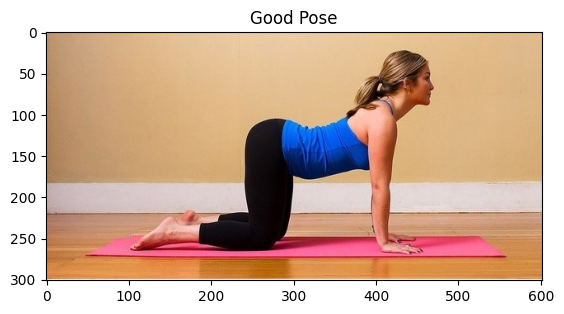

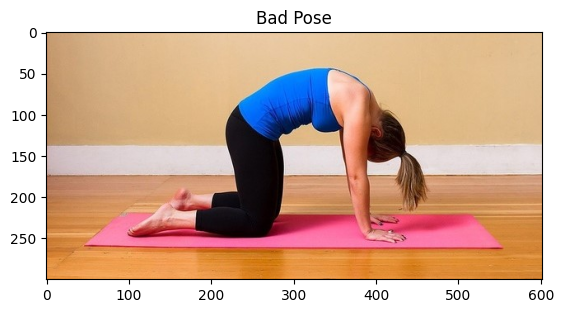

In [6]:
import cv2
from matplotlib import pyplot as plt

good_pose = cv2.imread('good_pose.jpeg')
bad_pose = cv2.imread('bad_pose.jpeg')

# Convert BGR to RGB for displaying with matplotlib
good_pose_rgb = cv2.cvtColor(good_pose, cv2.COLOR_BGR2RGB)
bad_pose_rgb = cv2.cvtColor(bad_pose, cv2.COLOR_BGR2RGB)

# Display images
plt.imshow(good_pose_rgb)
plt.title("Good Pose")
plt.show()

plt.imshow(bad_pose_rgb)
plt.title("Bad Pose")
plt.show()


/usr/local/lib/python3.10/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


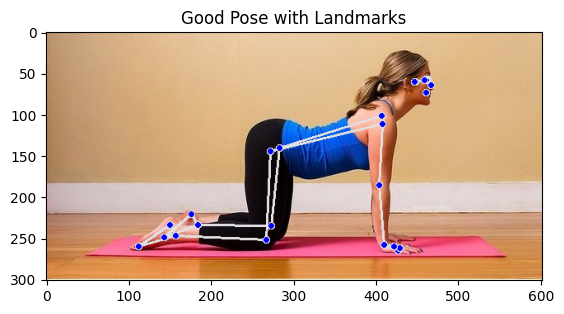

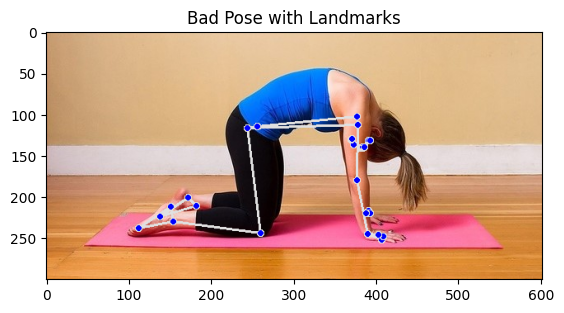

In [7]:
import mediapipe as mp

mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5)
mp_drawing = mp.solutions.drawing_utils

# Process the good pose image
result_good = pose.process(good_pose_rgb)
result_bad = pose.process(bad_pose_rgb)

# Draw landmarks on the good pose image
if result_good.pose_landmarks:
    mp_drawing.draw_landmarks(good_pose_rgb, result_good.pose_landmarks, mp_pose.POSE_CONNECTIONS)

# Draw landmarks on the bad pose image
if result_bad.pose_landmarks:
    mp_drawing.draw_landmarks(bad_pose_rgb, result_bad.pose_landmarks, mp_pose.POSE_CONNECTIONS)

# Display the results
plt.imshow(good_pose_rgb)
plt.title("Good Pose with Landmarks")
plt.show()

plt.imshow(bad_pose_rgb)
plt.title("Bad Pose with Landmarks")
plt.show()


In [8]:
def extract_keypoints(results):
    keypoints = []
    for landmark in results.pose_landmarks.landmark:
        keypoints.append([landmark.x, landmark.y, landmark.z])
    return keypoints

good_pose_keypoints = extract_keypoints(result_good)
bad_pose_keypoints = extract_keypoints(result_bad)

print("Good Pose Keypoints:", good_pose_keypoints)
print("Bad Pose Keypoints:", bad_pose_keypoints)


Good Pose Keypoints: [[0.7771244645118713, 0.2185070812702179, -0.0686173290014267], [0.7702115774154663, 0.19597932696342468, -0.05917220190167427], [0.768538236618042, 0.19555938243865967, -0.05918756127357483], [0.766534686088562, 0.19489893317222595, -0.059173692017793655], [0.7686915397644043, 0.1970071792602539, -0.090964674949646], [0.7663376331329346, 0.19724324345588684, -0.0910143107175827], [0.7637407779693604, 0.19715064764022827, -0.09101399034261703], [0.7453881502151489, 0.20287486910820007, 0.005938646383583546], [0.7432020902633667, 0.2049180567264557, -0.13685284554958344], [0.7674168348312378, 0.24669089913368225, -0.04259161278605461], [0.7659736275672913, 0.24610701203346252, -0.08421029150485992], [0.6766262054443359, 0.34140217304229736, 0.1388949602842331], [0.6780321002006531, 0.3749009966850281, -0.22903506457805634], [0.6702520847320557, 0.5891188383102417, 0.14327697455883026], [0.6720936894416809, 0.6198008060455322, -0.23056507110595703], [0.67790335416793

In [9]:
X = [good_pose_keypoints, bad_pose_keypoints]
y = [0, 1]  # 0 for good, 1 for bad


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

X = np.array(X).reshape(len(X), -1)
y = np.array(y)

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X, y)

print("Model trained successfully")


Model trained successfully


In [4]:
from google.colab import files
uploaded = files.upload()


Saving good_pose.jpeg to good_pose (2).jpeg


In [11]:
new_image = cv2.imread('bad_pose.jpeg')
new_image_rgb = cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB)
result_new = pose.process(new_image_rgb)

new_keypoints = extract_keypoints(result_new)
new_keypoints = np.array(new_keypoints).reshape(1, -1)
new_keypoints = scaler.transform(new_keypoints)

prediction = model.predict(new_keypoints)
print("Prediction:", "Good Pose" if prediction == 0 else "Bad Pose")

if prediction == 1:  # Bad pose detected
    print("Warning: Bad Pose Detected!")
    # You can add sound alerts here using libraries like playsound



Prediction: Bad Pose


/usr/local/lib/python3.10/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
